# **Módulo 2: Preparação e Exploração de Dados**



Neste notebook, você encontrará os exemplos e explicações usados no Módulo 2, mostrando passo a passo como explorar e preparar um dataset antes da modelagem.

Aqui você vai:

- analisar a estrutura e as características do conjunto de dados;  
- visualizar distribuições e relações entre variáveis;  
- tratar valores ausentes;  
- aplicar codificação em variáveis categóricas;  
- normalizar ou padronizar atributos numéricos.

Cada bloco contém explicações diretas e o código correspondente, para que você entenda o propósito de cada etapa.

Quando estiver pronto(a), execute a primeira célula e comece explorando o dataset.


## **Importando Dataset**

Nesta etapa, importamos as bibliotecas que serão utilizadas ao longo deste módulo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Neste trecho, utilizaremos uma base de dados bastante conhecida do Scikit-learn, o fetch_california_housing. Usaremos uma versão hospedada no GitHub, adaptada para facilitar a compreensão e o aprendizado.

In [ ]:
url = "https://raw.githubusercontent.com/TreinamentoICCInatel/Curso_Regressao_na_Pratica/refs/heads/main/Arquivos/housing_git.csv"
housing = pd.read_csv(url)

Agora nossos dados foram tranformados em um **DataFrame do pandas**, que é a estrutura mais usada para trabalhar com dados em formato de tabela no Python.

## **Análise Exploratória dos Dados**

Antes de começar qualquer modelagem ou tratamento, é fundamental fazer uma **análise inicial dos dados**.  
Essa etapa serve para **entender melhor o conjunto de dados**, identificar **padrões, erros, valores ausentes** e ter uma noção geral de **como as variáveis se comportam**.  

Explorar os dados logo no início ajuda a **evitar interpretações erradas** e a tomar **decisões mais informadas** nas próximas etapas, como o tratamento e a escolha dos modelos.  
Funções simples, como visualizar as primeiras linhas (`head()`), examinar informações básicas (`info()`) e gerar estatísticas descritivas (`describe()`), já fornecem uma visão muito útil sobre a base.


#### **.head()**

Com o comando `housing.head()`, visualizamos as **primeiras linhas do DataFrame**. Isso ajuda a entender rapidamente como os dados estão organizados, quais são as **colunas disponíveis** e o tipo de informação que cada uma traz.


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### **.info()**

O comando `housing.info()` mostra um **resumo geral da base de dados**, incluindo quantas entradas existem, quais colunas estão presentes, os **tipos de dados** (numéricos, texto etc.) e se há **valores ausentes**.  
É uma forma rápida de conhecer a estrutura da base.


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### **.describe()**

Com `housing.describe()`, obtemos **estatísticas descritivas** das colunas numéricas, como média, mediana, desvio padrão, valores mínimos e máximos.  
Esse resumo ajuda a entender o **comportamento e a distribuição** dos dados.


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Essas três funções são normalmente usadas em sequência para obter uma visão geral dos dados antes de realizar qualquer transformação.

## **Visualizando os Dados**

Após compreender a estrutura geral dos dados, o próximo passo é realizar uma **análise gráfica**.
Visualizar os dados é essencial para **enxergar padrões, tendências e relações** que nem sempre ficam claros apenas com tabelas ou estatísticas.  

Os **gráficos** nos ajudam a identificar **correlações entre variáveis**, **distribuições**, **valores atípicos (outliers)** e até **possíveis erros** na base.  
Essa etapa é importante porque fornece **insights visuais** que orientam o tratamento dos dados e a construção dos modelos de forma mais precisa.


#### **pairplot**

O **Seaborn** é uma biblioteca voltada para visualização de dados de forma prática e informativa.  
Com o comando `pairplot`, podemos gerar uma matriz de gráficos de dispersão que mostra as relações entre várias variáveis numéricas ao mesmo tempo.

Nos gráficos fora da diagonal, vemos como duas variáveis se relacionam — por exemplo, se o aumento da renda média está associado a um aumento no valor médio das casas.  
Já na diagonal, aparecem **histogramas**, que mostram a distribuição dos valores de cada variável individualmente.

Selecionamos apenas algumas colunas (`median_house_value`, `median_income`, `total_rooms` e `housing_median_age`)  
para manter a visualização mais clara e objetiva, já que incluir todas as variáveis geraria uma quantidade muito grande de gráficos.

Gráficos como este ajudam a verificar tendências lineares e identificar possíveis outliers que podem afetar a regressão.


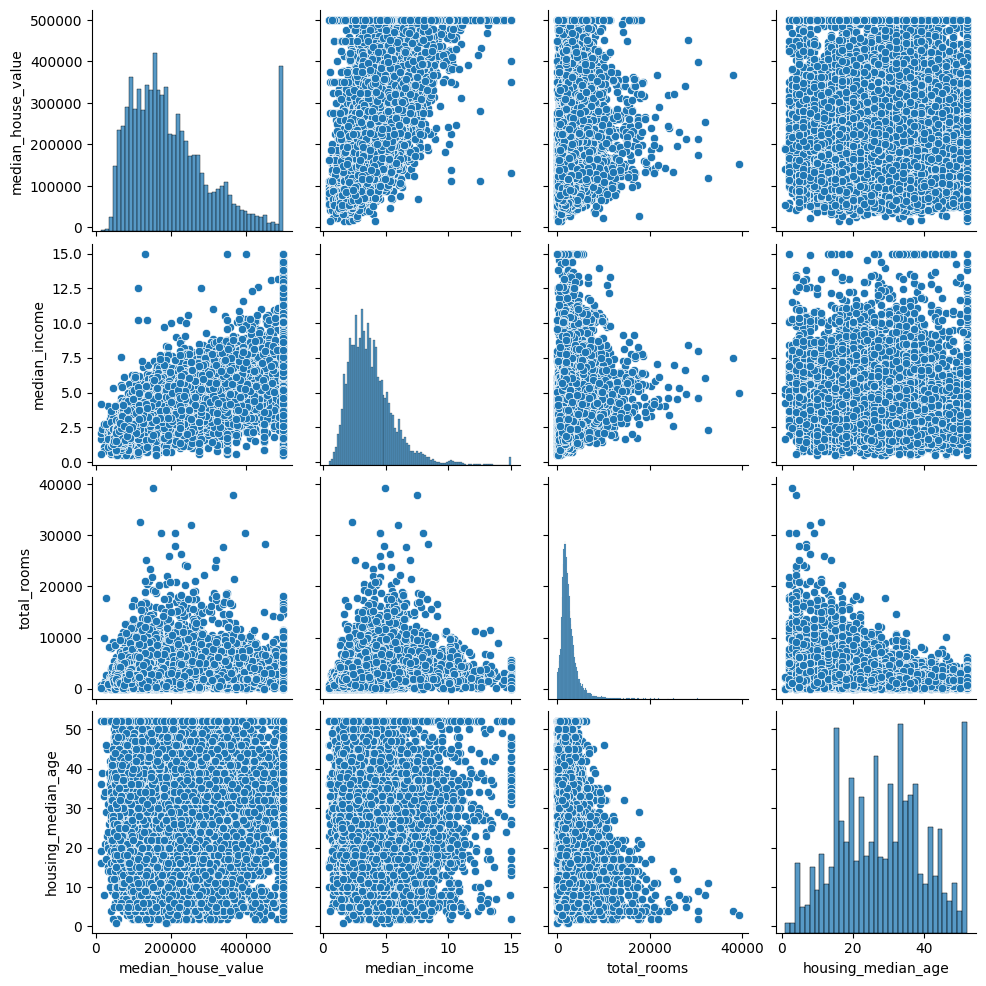

In [ ]:
sns.pairplot(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], diag_kind="hist")
plt.show()

Além das visualizações gerais, também podemos criar gráficos específicos para analisar em detalhe a relação entre duas variáveis.  
O Seaborn facilita isso com o comando `scatterplot`, que exibe um gráfico de dispersão simples e personalizável.

No exemplo abaixo, observamos como a **renda média (`median_income`)** se relaciona com o **valor médio das casas (`median_house_value`)**.  
Cada ponto representa um distrito, e o parâmetro `alpha` controla a transparência, permitindo visualizar melhor as regiões com maior concentração de dados.


<Axes: xlabel='median_income', ylabel='median_house_value'>

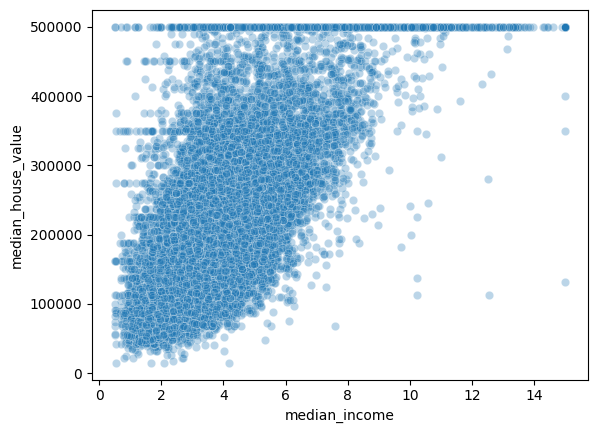

In [ ]:
sns.scatterplot(data=housing, x="median_income", y="median_house_value", alpha=0.3)


#### **scatter_matrix**

O **Pandas** também permite gerar uma matriz de dispersão de forma simples, usando o comando `scatter_matrix`.  


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

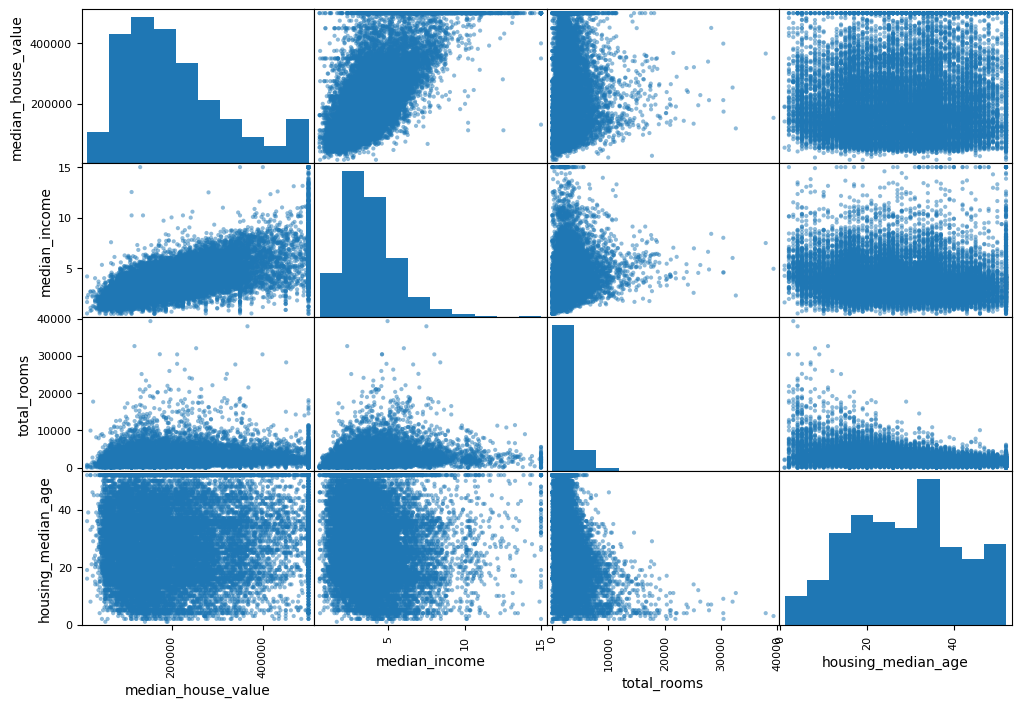

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

O comando a seguir é uma forma prática de visualizar um **gráfico de dispersão específico** usando o próprio pandas.  


<Axes: xlabel='median_income', ylabel='median_house_value'>

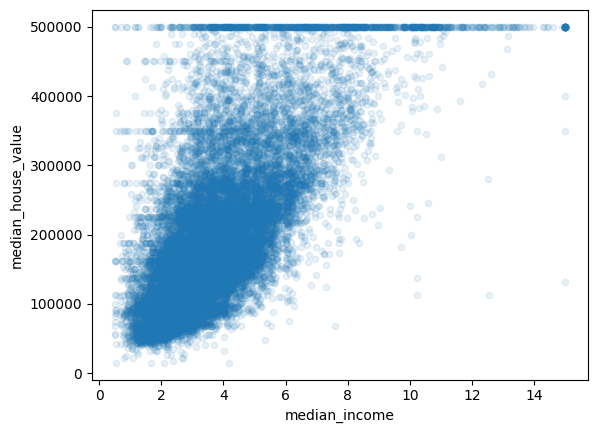

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

#### **heatmap**

O **heatmap** (ou mapa de calor) é uma visualização que mostra a **correlação entre todas as variáveis numéricas** da base de dados.  
Cada quadrado representa o grau de relação entre duas variáveis: valores próximos de **1** indicam correlação positiva forte; valores próximos de **-1**, correlação negativa forte; e valores próximos de **0**, pouca ou nenhuma correlação.

As **cores** indicam se essa correlação é **positiva** (valores sobem juntos) ou **negativa** (um valor aumenta enquanto o outro diminui).  
Esse tipo de gráfico é muito útil para **identificar padrões gerais** e descobrir quais variáveis estão mais relacionadas, o que pode ajudar na etapa de modelagem.

A matriz de correlação é uma ferramenta essencial na análise exploratória, pois ajuda a identificar variáveis redundantes e potenciais preditores para o modelo.


<Axes: >

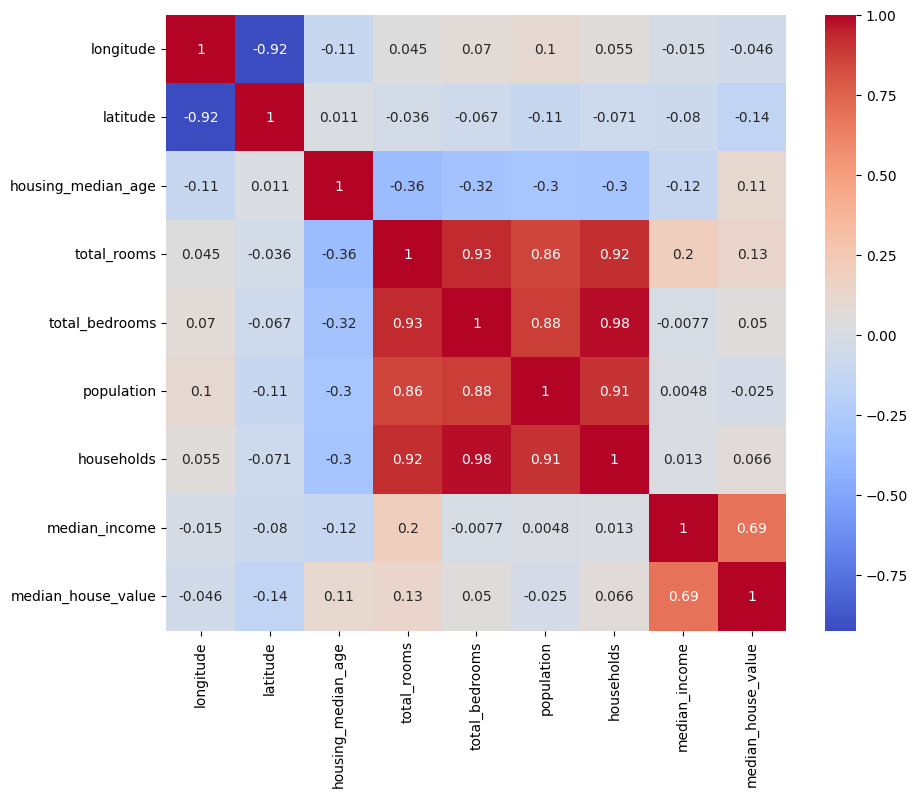

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


## **Tratando Dados**

Vamos dar uma olhada mais de perto na coluna **`ocean_proximity`**, que representa a **proximidade das casas em relação ao oceano**.

In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Diferente das outras colunas numéricas, ela é uma **variável categórica**, ou seja, seus valores são **categorias de texto** e não números.  

Esse é um bom ponto para introduzir o tema de **tratamento de dados**, que é o processo de **preparar e limpar os dados** antes de usá-los em um modelo.  
Nessa etapa, lidamos com situações como **valores faltantes**, **inconsistências** e **variáveis categóricas** — que precisam ser convertidas para números, já que os **modelos de aprendizado de máquina só trabalham com dados numéricos**.  

Analisar a coluna `ocean_proximity` nos ajuda a entender como aplicar essas transformações de forma correta e preparar nossa base para o modelo.

### **Tratando valores ausentes**

#### **SimpleImputer**

O **SimpleImputer** é uma ferramenta do Scikit-Learn usada para **preencher valores faltantes** em um conjunto de dados.  
Em vez de simplesmente remover linhas ou colunas com dados ausentes, o SimpleImputer substitui esses valores por uma **estratégia definida**, como a **média**, **mediana** ou **valor mais frequente** da coluna.  

Isso é importante porque muitos modelos de aprendizado de máquina **não conseguem lidar com valores nulos** diretamente.  
Usar o SimpleImputer ajuda a **manter a integridade dos dados** e garante que todas as observações possam ser utilizadas durante o treinamento do modelo.


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# removendo ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
#substituindo os valores faltantes no dataset
X = imputer.transform(housing_num)

housing_num = pd.DataFrame(X, columns=housing_num.columns)

Aqui utilizamos o **SimpleImputer** para lidar com os valores faltantes da base de dados.  
Primeiro, removemos a coluna `ocean_proximity`, pois ela é **categórica** e o SimpleImputer só funciona com **valores numéricos**.  

Em seguida, criamos o objeto `imputer` com a estratégia `"median"`, o que significa que os valores ausentes serão substituídos pela **mediana** de cada coluna.  
Por fim, usamos o comando `imputer.fit(housing_num)` para **ajustar o imputador aos dados**, calculando a mediana de cada atributo numérico — esses valores serão usados depois para preencher os espaços vazios.


### **Codificando variáveis categóricas**

#### **OneHotEncoder**

O **OneHotEncoder** é uma ferramenta usada para transformar **variáveis categóricas** em **valores numéricos**, permitindo que os modelos de aprendizado de máquina consigam trabalhar com elas.  

Ele cria **novas colunas**, uma para cada categoria da variável original, marcando com **1** quando a observação pertence àquela categoria e **0** caso contrário.  

Por exemplo, se a coluna `ocean_proximity` tiver as categorias *"INLAND"*, *"NEAR OCEAN"* e *"ISLAND"*, o OneHotEncoder cria três novas colunas, uma para cada categoria.  
Esse processo é importante porque os **modelos só entendem números**, e o OneHotEncoder permite representar as categorias **sem atribuir uma ordem numérica incorreta** entre elas.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Selecionar a coluna categórica
housing_cat = housing[["ocean_proximity"]]  # precisa ser 2D para o OneHotEncoder

# Criar e ajustar o encoder
cat_encoder = OneHotEncoder()
housing_cat_1hot_dense = cat_encoder.fit_transform(housing_cat)

# Obter os nomes das novas features
cat_feature_names = cat_encoder.get_feature_names_out(["ocean_proximity"])

# Criar o DataFrame final
#housing_s = pd.DataFrame(housing_cat_1hot_dense, columns=cat_feature_names)
housing_s = pd.DataFrame.sparse.from_spmatrix(housing_cat_1hot_dense, columns=cat_feature_names)

housing_s.head(10)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1.0,0
1,0,0,0,1.0,0
2,0,0,0,1.0,0
3,0,0,0,1.0,0
4,0,0,0,1.0,0
5,0,0,0,1.0,0
6,0,0,0,1.0,0
7,0,0,0,1.0,0
8,0,0,0,1.0,0
9,0,0,0,1.0,0


### **Padronizar ou Normalizar os Dados**

Depois de tratar os valores ausentes e converter as variáveis categóricas, o próximo passo é **padronizar ou normalizar** os dados.  
Essas técnicas servem para **ajustar a escala das variáveis numéricas**, garantindo que todas fiquem dentro de faixas semelhantes de valores.

Isso é importante porque muitos algoritmos de aprendizado de máquina são **sensíveis à escala dos dados** — variáveis com números muito grandes podem influenciar mais o modelo do que outras, mesmo sem serem as mais relevantes.  

As duas abordagens mais usadas são o **MinMaxScaler** e o **StandardScaler**.


#### **MinMaxScaler**

O **MinMaxScaler** transforma os dados para que todos os valores fiquem dentro de um **intervalo específico**, normalmente entre **0 e 1**.  
Ele é útil quando queremos **preservar a forma original da distribuição dos dados**, apenas redimensionando os valores para uma mesma faixa.  

Essa técnica é especialmente vantajosa quando as variáveis têm **limites definidos** e queremos evitar que valores extremos tenham muito peso.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
housing_minmax = scaler.fit_transform(housing_num)

housing_minmax = pd.DataFrame(housing_minmax, columns=housing_num.columns)
housing_minmax.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638


#### **StandartScaler**

O **StandardScaler** faz a **padronização** dos dados, ajustando cada coluna para que tenha **média 0 e desvio padrão 1**.  
Isso significa que os valores passam a ser medidos em relação a **quantos desvios padrão estão acima ou abaixo da média**.

Esse método é ideal quando os dados seguem (ou se aproximam de) uma **distribuição normal**.  
Ele é muito usado em algoritmos como **Regressão Linear, Regressão Logística, SVM e Redes Neurais**, que dependem da escala para calcular distâncias e gradientes corretamente.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_standard = scaler.fit_transform(housing_num)

housing_standard = pd.DataFrame(housing_standard, columns= housing_num.columns)
housing_standard.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


#### **pd.concat()**

Para combinar os métodos de tratamento de variáveis categóricas e numéricas, podemos utilizar a função pd.concat() do pandas.

In [ ]:
housing = pd.concat([housing_standard, housing_s], axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1.0,0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0,0,0,1.0,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1.0,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1.0,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1.0,0


## **Recombinando dados**

Como vimos nos tópicos anteriores, colunas categóricas e numéricas exigem tratamentos diferentes.  
Agora que cada grupo já passou pelo seu processo adequado, precisamos reunir tudo novamente.

Nesta etapa, combinamos a saída do OneHotEncoder (`housing_s`) com os dados padronizados pelo StandardScaler (`housing_standard`), unificando as colunas já tratadas em um único conjunto.

In [ ]:
housing = pd.concat([housing_standard, housing_s], axis=1)

E com isso, finalizamos o notebook do Módulo 2.  
Concluímos todo o processo de preparação dos dados, aplicando os tratamentos necessários para colunas categóricas e numéricas e reunindo tudo em um único conjunto já padronizado.  
Agora os dados estão prontos para serem utilizados nas etapas seguintes, onde finalmente construiremos e avaliaremos nossos modelos.
